# Project : When Was the Golden Age of Video Games?
Within this project scope, we'll delve into analyzing critic and user scores alongside sales data for the top 400 video games released since 1977. <br>
Our primary objective is to pinpoint a potential "golden age" of video games by identifying release years that garnered high acclaim from both users and critics. <br> 
Additionally, we'll delve into the business landscape of gaming by examining comprehensive game sales data.
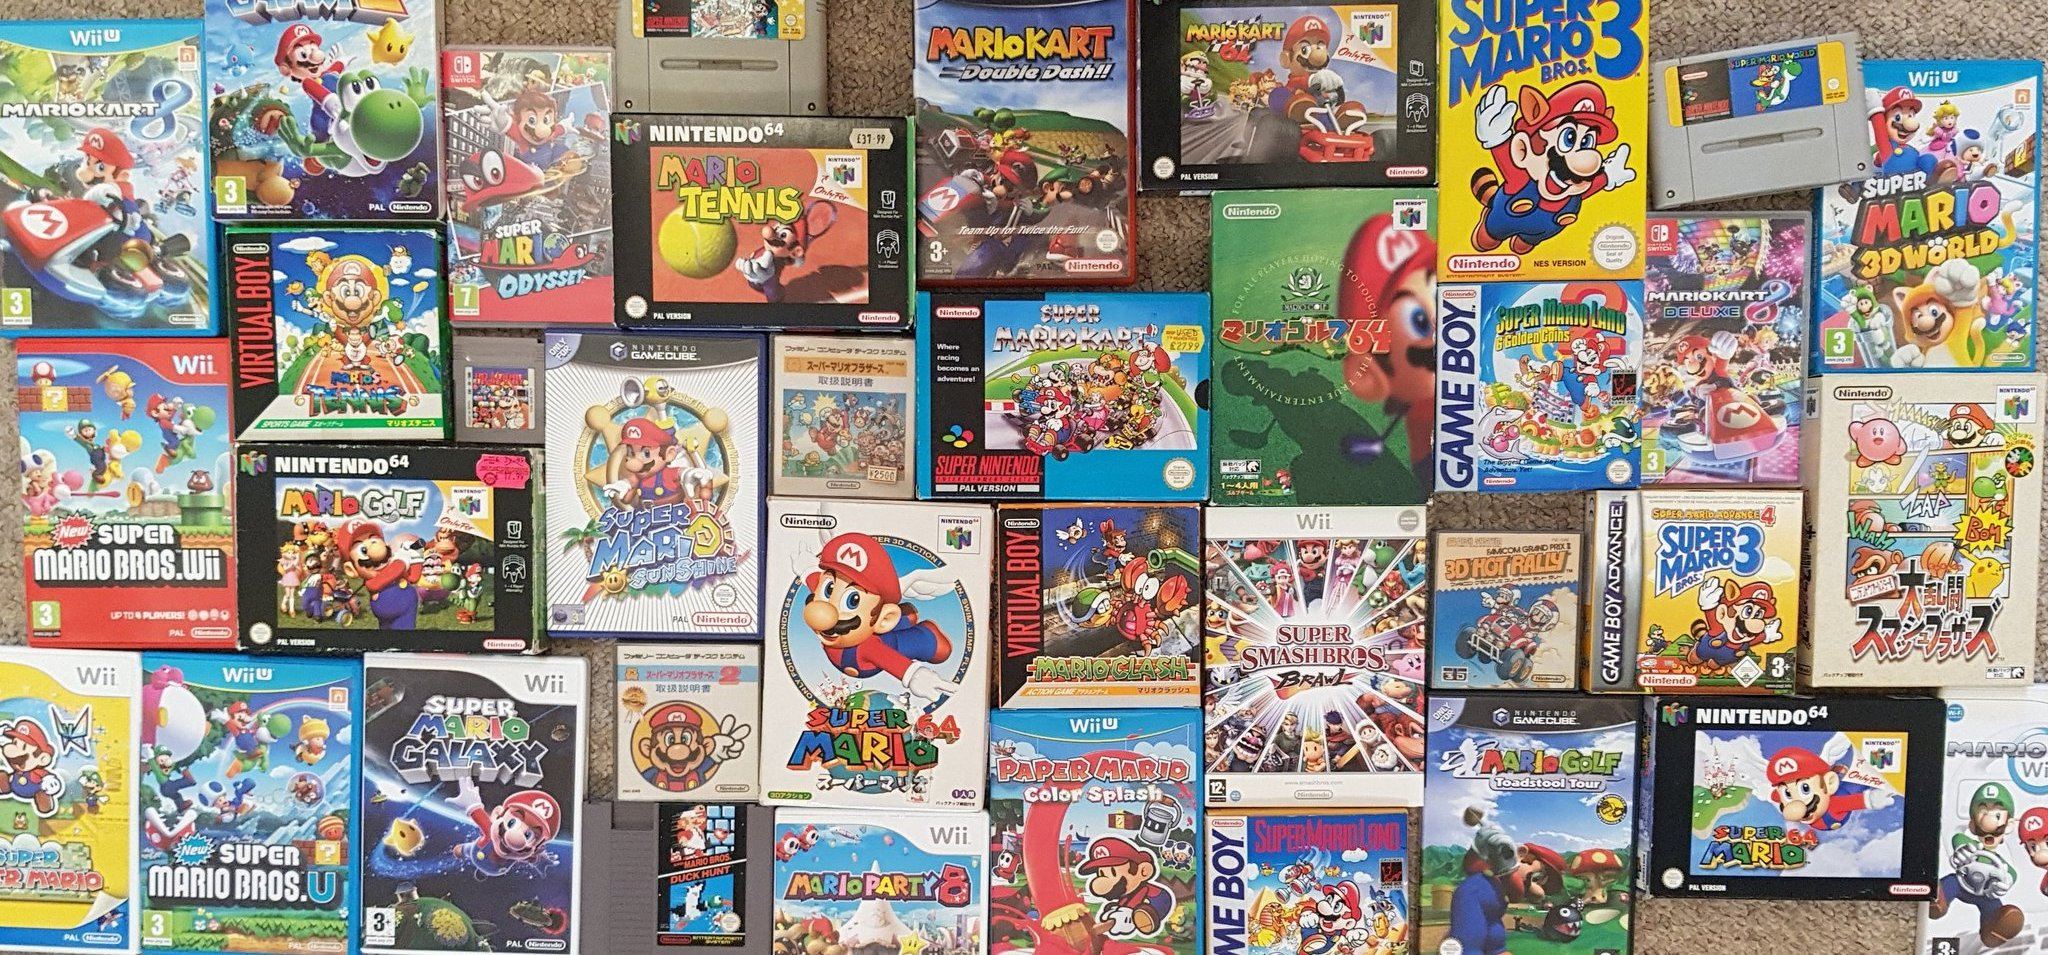

## Installing sql_magic
Using pip (pip install sql_magic pandas) installs the Python packages, sql_magic and pandas, augmenting your Python environment. <br>
This enables you to leverage their capabilities within your code, especially in Jupyter Notebooks or Python scripts, empowering you to execute SQL commands seamlessly and manipulate data efficiently through pandas DataFrames.

In [ ]:
pip install sql_magic pandas

## Importing pyodbc and loading extension
Importing pyodbc allows you to access its functionalities, enabling seamless interaction between your Python code and ODBC-compliant databases, facilitating database connections, querying, and data manipulation from within your Python environment.

In [2]:
%load_ext sql_magic
import pyodbc


# Creating a connection with SQL Server 

In [3]:
server = 'LAPTOP-8N300FLF\SQLEXPRESS'
database = 'games'


In [4]:
conn_str = f"DRIVER={{SQL Server}};SERVER=LAPTOP-8N300FLF\\SQLEXPRESS;DATABASE=games;Trusted_Connection=yes;"


In [5]:
connection = pyodbc.connect(conn_str)

# Activate the SQL magic
%config SQL.conn_name = 'connection'

In database, we've confined each table to 400 rows specifically for this project. However, the comprehensive dataset comprising over 13,000 games is available on Kaggle.

 
>**game_details**

| column      | type        | meaning
| ----------- | ----------- |------------
| *game*      | varchar     | Name of the video game
| platform    | varchar     | Gaming platform 
| publisher   | varchar     | Game publisher
| developer   | varchar     | Game developer
| games_sold  | float       | Number of copies sold (millions)
| year        | int         | Release year


>**reviews**

| column         | type       | meaning
|--------------  |------------|--------------
| *game*         | varchar    | Name of the video game
| critic_score   | float      | critic score according to metacritic
| user_score     | float      | User score according to metacritic

## 1. Top ten best selling Video games
**Let's start by exploring some of the most successful video games in history!**

In [6]:
%%read_sql 
    SELECT 
        TOP(10)* 
    FROM 
        game_details
    ORDER BY 
        games_sold DESC;

Query started at 11:50:04 AM India Standard Time; Query executed in 0.00 m

,game,platform,publisher,developer,games_sold,year
0,Wii Sports for Wii,Wii,Nintendo,Nintendo EAD,82.90,2006.0
1,Super Mario Bros. for NES,NES,Nintendo,Nintendo EAD,40.24,1985.0
2,Counter-Strike: Global Offensive for PC,PC,Valve,Valve Corporation,40.00,2012.0
3,Mario Kart Wii for Wii,Wii,Nintendo,Nintendo EAD,37.32,2008.0
4,PLAYERUNKNOWN'S BATTLEGROUNDS for PC,PC,PUBG Corporation,PUBG Corporation,36.60,2017.0
5,Minecraft for PC,PC,Mojang,Mojang AB,33.15,2010.0
6,Wii Sports Resort for Wii,Wii,Nintendo,Nintendo EAD,33.13,2009.0
7,Pokemon Red / Green / Blue Version for GB,GB,Nintendo,Game Freak,31.38,1998.0
8,New Super Mario Bros. for DS,DS,Nintendo,Nintendo EAD,30.80,2006.0
9,New Super Mario Bros. Wii for Wii,Wii,Nintendo,Nintendo EAD,30.30,2009.0


## 2. Missing Reviews Scores
The top-selling video games span from 1985 to 2017! That's a huge timeframe. To dig deeper into the prime years for video games, we'll need to dive into the reviews table for additional insights.

However, let's talk about our database limitations. A significant drawback is the absence of review data for several games listed in the game_details table.

In [7]:
%%read_sql 
    SELECT 
        COUNT(game_details.game) AS count_games
    FROM 
        game_details
    LEFT JOIN reviews
    ON 
        game_details.game = reviews.game
    WHERE 
        critic_score IS NULL AND user_score IS NULL;

Query started at 11:50:04 AM India Standard Time; Query executed in 0.00 m

,count_games
0,31


   ## 3. Years that video game critics loved
   Around less than ten percent of the games in the game_details table lack reviews data. <br>
   Despite this limitation, we can proceed with our exploration. <br>
   It's essential to consider this missing data while analyzing results from more complex queries.
   
   **Next_steps**
  - Evaluating the best years for video games involves various metrics.
  - Let's begin by examining critics' opinions as a starting point for our analysis.

In [8]:
%%read_sql
    SELECT 
        TOP(10)year , ROUND(AVG(critic_score),2) AS avg_critic_score
    FROM 
        game_details
    INNER JOIN reviews
    ON 
        game_details.game = reviews.game
    GROUP BY 
        year
    ORDER BY 
        avg_critic_score DESC;
    

Query started at 11:50:04 AM India Standard Time; Query executed in 0.00 m

,year,avg_critic_score
0,1990.0,9.80
1,1992.0,9.67
2,1998.0,9.32
3,2020.0,9.20
4,1993.0,9.10
5,1995.0,9.07
6,2004.0,9.03
7,1982.0,9.00
8,2002.0,8.99
9,1999.0,8.93


## 4. Was 1982 really that great?
**Assessing Critic Reviews:**
- The era of noteworthy years, as per critic reviews, extends from 1982 to 2020.
- Yet, determining the true golden age of video games remains elusive.

**Review Analysis Insight:**
- However, certain average critic scores appear peculiarly rounded, notably the figure for 1982.
- This suggests a possibility: limited representation of video games released in specific years within our dataset.

**Further Exploration:**
- To confirm the authenticity of the high score in 1982, let's refine our query to delve deeper into whether it truly marked a remarkable year for video games.



In [9]:
%%read_sql
    -- Include game count per year and alias it as num_games
    -- Filter the query to display only years with more than four games released
    SELECT 
        TOP(10) year , ROUND(AVG(critic_score),2) AS avg_critic_score , COUNT(year) AS num_games
    FROM 
        game_details
    INNER JOIN reviews
    ON 
        game_details.game = reviews.game
    GROUP BY 
        year
    HAVING 
        COUNT(critic_score)>4
    ORDER BY 
        avg_critic_score DESC , num_games DESC;
        
    

Query started at 11:50:04 AM India Standard Time; Query executed in 0.00 m

,year,avg_critic_score,num_games
0,1998.0,9.32,10
1,2004.0,9.03,11
2,2002.0,8.99,9
3,1999.0,8.93,11
4,2001.0,8.82,13
5,2011.0,8.76,26
6,2016.0,8.67,13
7,2013.0,8.66,18
8,2008.0,8.63,20
9,2017.0,8.62,13


## 5. Years that dropped off the critics' favorites list
**Improved Analysis:**

- The inclusion of the **num_games column** in our updated list provides confidence. It signifies that our compilation of the top games from critics represents years with multiple well-reviewed games, not just isolated hits.

**Exploring Omitted Years:**

- Now, let's pinpoint the years omitted from the list due to having **four or fewer reviewed games**. This will aid future endeavors to gather more game reviews for those years and ascertain their potential as standout years for video game releases.

**Engaging Set Theory:**

- To initiate this exploration, we've prepared tables containing the outcomes of our preceding queries.

> ***top_critic_years***
 
 | column | type | meaning  
 | -------|------|-------
 |  year  | int  | year of video game release
 | avg_critic_score | float | average of all critic scores for games released in that year
 
> ***top_critic_years_more_than_four_games***

 | column | type | meaning  
 | -------|------|-------
 |  year  | int  | year of video game release
 | num_games | int | Count of the number of video games released in that year
 | avg_critic_score | float | average of all critic scores for games released in that year

In [10]:
 %%read_sql
    -- Select year and avg_critic_score for first critics favorites not in the second list (<= 4 games). 
    -- Order by avg_critic_score descending.

    SELECT 
        year , avg_critic_score
    FROM 
        top_critic_years
    WHERE year NOT IN (
                        SELECT year
                        FROM top_critic_years_more_than_four_games)
    ORDER BY 
        avg_critic_score DESC

Query started at 11:50:04 AM India Standard Time; Query executed in 0.00 m

,year,avg_critic_score
0,1990.0,9.80
1,1992.0,9.67
2,2020.0,9.20
3,1993.0,9.10
4,1995.0,9.07
5,1982.0,9.00


## 6. Year video game players loved
**Assessment from Previous Task:**
- Early 1990s show potential as video game golden age solely based on critic scores.
- Additional games and reviews data required for deeper analysis.

**Transition to Player Perspective:**

- Shifting focus to user opinions: Crafting a query similar to Task Four but targeting yearly average user scores instead of critic scores.

In [11]:
 %%read_sql
    -- Filter for years with more than four reviewed games, group by year, order by avg_user_score descending, limit to top ten years.

    SELECT 
        TOP(10)year,ROUND(AVG(user_score),2) AS avg_user_score , COUNT(year) AS num_games
    FROM 
        game_details
    INNER JOIN reviews
    ON 
        game_details.game = reviews.game
    GROUP BY 
        year
    HAVING 
        COUNT(year)>4
    ORDER BY 
        avg_user_score DESC , num_games DESC;
    

Query started at 11:50:04 AM India Standard Time; Query executed in 0.00 m

,year,avg_user_score,num_games
0,1997.0,9.50,8
1,1998.0,9.40,10
2,2010.0,9.24,23
3,2009.0,9.18,20
4,2008.0,9.03,20
5,1996.0,9.00,5
6,2006.0,8.95,16
7,2005.0,8.95,13
8,1999.0,8.80,11
9,2002.0,8.80,9


## 7. Years that both Players and Critics loved
**Examining Top Years:**

- We've compiled top ten years from critic and user reviews. Any overlap between these lists would signify exceptional years!

**Consideration of Available Data:**

- Remember, our access includes the top_critic_years_more_than_four_games table—a repository of results from our Task 4 query on top critic years.

> ***top_critic_years_more_than_four_games***

|column | type | meaning
| ----- | ---- | -------
| year  | int  | year of video game release
| num_games | int | Count of the number of video games released in that year
| avg_critic_score |float | Average of all critic scores for games released in that year

> ***top_user_years_more_than_four_games***

|column | type | meaning
| ----- | ---- | -------
| year  | int  | year of video game release
| num_games | int | Count of the number of video games released in that year
| avg_user_score |float | Average of all user scores for games released in that year

In [12]:
%%read_sql
-- Find years common to both top_critic_years_more_than_four_games and top_user_years_more_than_four_games tables.
-- Utilize set theory to extract years present in both tables.

    SELECT 
        t1.year
    FROM 
        top_critic_years_more_than_four_games t1
    INNER JOIN top_user_years_more_than_four_games t2
    ON 
        t1.year = t2.year;
        

Query started at 11:50:05 AM India Standard Time; Query executed in 0.00 m

,year
0,1998.0
1,1999.0
2,2008.0


## 8. Sales in the best video game years
**Assessing Agreed-Upon Years:**

- Three years align as top ten choices for both users and critics!
- Despite various metrics for defining the best gaming years, let's focus on these years for now.
- Now, exploring game makers' perspective: Were sales promising?

In [13]:
%%read_sql
    SELECT year,SUM(games_sold) AS total_games_sold
    FROM game_details
    WHERE year IN (SELECT t1.year
    FROM top_critic_years_more_than_four_games t1
    INNER JOIN top_user_years_more_than_four_games t2
    ON t1.year=t2.year)
    GROUP BY year

Query started at 11:50:05 AM India Standard Time; Query executed in 0.00 m

,year,total_games_sold
0,1998.0,101.52
1,1999.0,74.90
2,2008.0,175.07


### Based on the sales data for the overlapping years in both the top critic and top user lists:

    1998: Achieved a total game sales of approximately 101.52 million.
    1999: Recorded a total of about 74.90 million games sold.
    2008: Emerged as a significant year with a substantial sales figure, totaling around 175.07 million games sold.

These figures showcase varying levels of success in game sales across these years, indicating potential correlations between critical acclaim, user preference, and commercial success in the gaming industry.